# STATISTICAL EXPERIMENTS AND SIGNIFICANCE TESTING

Import required Python packages

In [8]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [11]:
session_times = pd.read_csv(r"E:\Personal\Full_Stack_Data_Analyst\Data Science\O'Reilly Books\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\web_page_data.csv")
session_times.Time=100*session_times.Time

The pandas `boxplot` command uses the keyword argument `by` to create the figure:

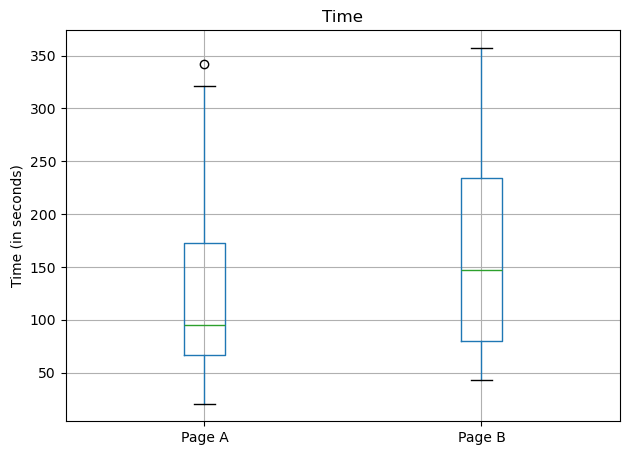

In [25]:
ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In _Python_, we filter the `pandas` data frame first by page and then determine the mean of the `Time` column:

In [28]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_b - mean_a

35.66666666666667

To apply a permutation test, we need a function to randomly assign the 36 session times to a group of 21 (page A) and a group of 15 (page B). The _Python_ version of this permutation test is the following:

In [47]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean()-x.loc[list(idx_A)].mean()

nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
perm_fun(session_times.Time, nA, nB)

5.7238095238095354

This function works by sampling (without replacement) nB indices and assigning them to the B group; the remaining nA indices are assigned to group A. The difference between the two means is returned. Calling this function R = 1,000 times and specifying nA = 21 and nB = 15 leads to a distribution of differences in the session times that can be plotted as a histogram. In _Python_, we can create a similar graph using `matplotlib`: 

Text(0, 0.5, 'Frequency')

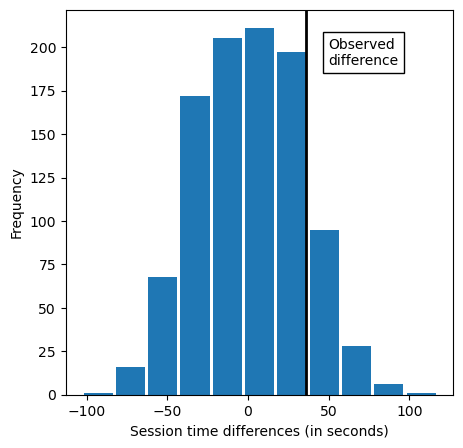

In [53]:
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range (1000)]

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x=mean_b - mean_a, color = 'black', lw=2)
ax.text(50,190, 'Observed\ndifference', bbox={'facecolor': 'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

The histogram, in Figure 3-4 shows that mean difference of random permutations often exceeds the observed difference in session times (the vertical line). As the simulation uses random numbers, the percentage will vary. For example, in the _Python_ version, we got 14.1%:

In [58]:
np.mean(perm_diffs > (mean_b - mean_a))

0.141

This suggests that the observed difference in session time between page A and page B is well within the range of chance variation and thus is not statistically significant.